# Practical Statistics for Data Scientists
## Chapter 1
#### dataset from kaggle


In [9]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean


In [3]:
medal_count = pd.read_excel("data\\Medals.xlsx")
medal_count

C:\Users\Charlie\anaconda3\envs\data_analyst_learning\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


## Estimates of Location

In [4]:
# Mean

medal_count["Total"].mean()

11.612903225806452

In [7]:
# Weighted mean
##  same as mean but every value is multiplied by another element - e.g. mean of total but every element is multiplied by their corresponding number from the Gold column

np.average(medal_count["Total"], weights=medal_count["Gold"])

46.832352941176474

In [13]:
# Trimmed mean 
## mean is susceptible to outliers so trimmed mean removes to and/or bottom x percent so the mean is more robust (robust means it is not sensitive to outliers)

trim_mean(medal_count["Total"], 0.1) # this cuts off to and bottom 10%

6.8933333333333335

In [18]:
# Weighted Median 
## median is more robust than mean especially for skewed data. Weighted median works the way as the weighted mean

def weighted_median(df, median_col, weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum() / 2.
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]



In [19]:
weighted_median(medal_count, "Total", "Gold")

40

In [22]:
# Percentile 
## this will calculate the 75th percentile of the Totals column
q3 = np.percentile(medal_count["Total"], 75)
q3

1.0

In [24]:
medal_count.describe() # this is a good way of getting key info on the dataframe

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## Estimates of Variability (Dispersion Metrics)

In [26]:
# Deviation 
## the difference between the observed value and the estimate of location. Also called Errors or Residuals

# Variance 
## square the deviations, from the mean, divide by n-1 where n is the number of instances

from statistics import variance

variance(medal_count["Gold"])


49.315100514259

In [27]:
# Standard Deviation
## square root of the variance
from statistics import stdev

stdev(medal_count["Gold"])

7.022471111671376

In [28]:
# Mean absolute deviation 
## mean of the absolute value of the deviations from the mean

from numpy import mean, absolute

mean(absolute(medal_count["Gold"] - mean(medal_count["Gold"])))

4.0048560527228565

In [29]:
# Median Absolute Deviation
## median of absoute deviation from the median

from numpy import median
median(absolute(medal_count["Gold"] - median(medal_count["Gold"])))

1.0

In [31]:
# Interquartile Range
## in this case it's the range of the middle 50% of the data
q3, q1 = np.percentile(medal_count["Gold"], [75, 25])
iqr = q3 - q1
iqr

3.0

## Standard Deviation and Related Estimates

#### One reason to prefer standard deviation to variance is that it operates on the same scale as the rest of the data
#### Variance and standard deviation are particularly susceptible to outliers because of how they square the deviations

# Exploring the Data Distribution

<AxesSubplot:>

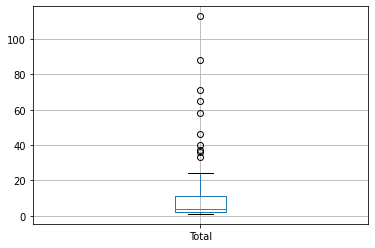

In [35]:
# Box Plots
## good way of showing percentiles

medal_count.boxplot(column="Total", by=None, ax=None)

In [38]:
# Frequency tables
## frequency tables divide the values of variables into equally spaced segments and quantify the number of observations in each segment

frequency_table = medal_count.copy()
frequency_table["freq"] = pd.cut(medal_count["Gold"], 10) # the 10 specifies the number of sections we want 
frequency_table.groupby("freq")["Rank"].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
        28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]),
 <BarContainer object of 30 artists>)

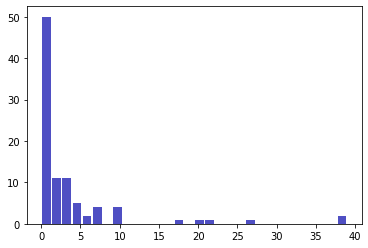

In [39]:
# Histogram
import matplotlib.pyplot as plt

plt.hist(x=medal_count["Gold"], bins= 'auto', color='#0504aa', alpha=0.7, rwidth=0.85)

Text(0.5, 0, 'gold medals')

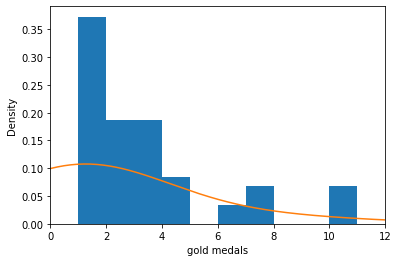

In [40]:
# Density Plot

ax = medal_count["Gold"].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
medal_count["Gold"].plot.density(ax=ax)
ax.set_xlabel("gold medals")

## Exploring Binary and Categorical Data
#### Expected Value = sum of each value multiplied by the probability of occurence


In [41]:
# Mode

medal_count["Gold"].mode()

0    0
dtype: int64

Text(0, 0.5, 'Gold medal count')

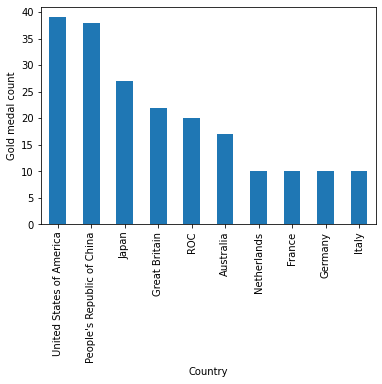

In [46]:
# Bar charts
## country plotted against number of gold medals 
bar_chart = medal_count.iloc[:10, :].plot.bar(x="Team/NOC", y="Gold", legend=False)
bar_chart.set_xlabel('Country')
bar_chart.set_ylabel('Gold medal count')

## Correlation 
#### Correlation Coefficient is sensitive to outliers and measures how one variable will change another variable
#### Correlation Matrix shows the correlation between all variables in a dataset. The primary diagonal will be 1s the entire way down

In [47]:
# Correlation Matrix

medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

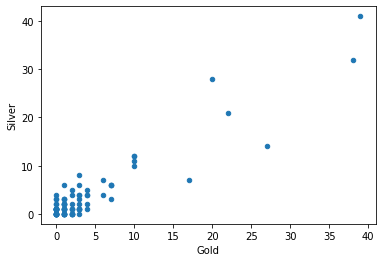

In [48]:
medal_count.plot.scatter(x='Gold', y='Silver')

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

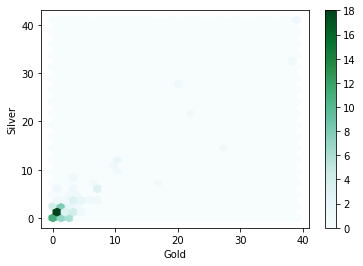

In [51]:
medal_count.plot.hexbin(x='Gold', y='Silver', gridsize=30, sharex=False)

C:\Users\Charlie\anaconda3\envs\data_analyst_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

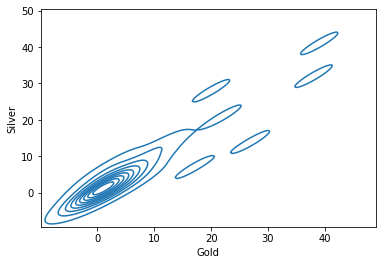

In [54]:
# Contour plot
## scatter plot that shows where the greatest density is

import seaborn as sns

ax = sns.kdeplot(medal_count["Gold"], medal_count["Silver"])
ax

<AxesSubplot:>

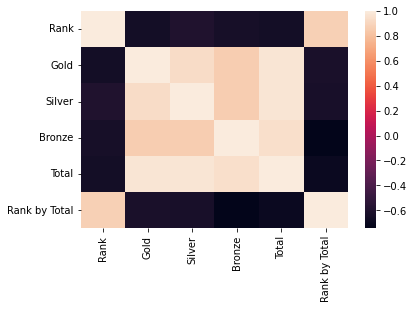

In [55]:
# Heatmap 

sns.heatmap(medal_count.corr())

In [61]:
# Contingency Table

crosstab = medal_count[["Silver", "Gold"]].pivot_table(index='Silver', columns='Gold', aggfunc=lambda x: len(x), margins=True)
crosstab.fillna(0)

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<AxesSubplot:xlabel='Gold'>

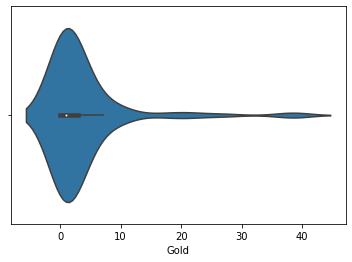

In [62]:
# Violin Plot

sns.violinplot(x=medal_count["Gold"])